# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

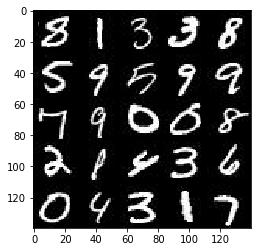

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

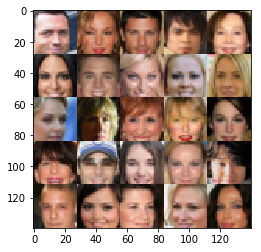

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    drop_rate = .2 
    with tf.variable_scope('discriminator', reuse = reuse ):
        #x1 = tf.layers.dropout(images, rate=drop_rate)
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x1 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        #X1 = tf.layers.dropout(x1, rate=drop_rate)
        x1 = tf.maximum(alpha * x1, x1)
        
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        #x3 = tf.layers.dropout(x3, rate=drop_rate)
        x3 = tf.maximum(alpha * x3, x3)
       
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6014... Generator Loss: 1.6219
Epoch 1/2... Discriminator Loss: 0.5818... Generator Loss: 1.7089
Epoch 1/2... Discriminator Loss: 0.5537... Generator Loss: 1.9592
Epoch 1/2... Discriminator Loss: 0.7006... Generator Loss: 3.1477
Epoch 1/2... Discriminator Loss: 0.7281... Generator Loss: 1.7968
Epoch 1/2... Discriminator Loss: 0.7536... Generator Loss: 1.4462
Epoch 1/2... Discriminator Loss: 0.6630... Generator Loss: 1.7042
Epoch 1/2... Discriminator Loss: 0.4436... Generator Loss: 2.9422
Epoch 1/2... Discriminator Loss: 0.4471... Generator Loss: 3.0661
Epoch 1/2... Discriminator Loss: 0.4003... Generator Loss: 3.5555


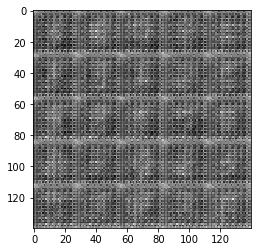

Epoch 1/2... Discriminator Loss: 0.4812... Generator Loss: 2.9010
Epoch 1/2... Discriminator Loss: 0.7332... Generator Loss: 1.5313
Epoch 1/2... Discriminator Loss: 0.5984... Generator Loss: 3.0559
Epoch 1/2... Discriminator Loss: 0.5540... Generator Loss: 2.6326
Epoch 1/2... Discriminator Loss: 0.5714... Generator Loss: 2.0594
Epoch 1/2... Discriminator Loss: 0.7197... Generator Loss: 3.4716
Epoch 1/2... Discriminator Loss: 0.6068... Generator Loss: 2.6702
Epoch 1/2... Discriminator Loss: 0.5429... Generator Loss: 2.1456
Epoch 1/2... Discriminator Loss: 0.6188... Generator Loss: 1.7338
Epoch 1/2... Discriminator Loss: 0.6467... Generator Loss: 2.1736


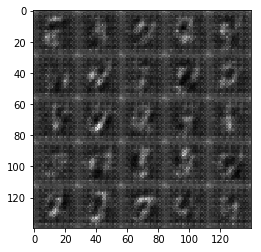

Epoch 1/2... Discriminator Loss: 0.7563... Generator Loss: 1.2537
Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.1527
Epoch 1/2... Discriminator Loss: 0.6008... Generator Loss: 1.7257
Epoch 1/2... Discriminator Loss: 1.2122... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 0.6318... Generator Loss: 2.5266
Epoch 1/2... Discriminator Loss: 0.5836... Generator Loss: 2.5378
Epoch 1/2... Discriminator Loss: 0.5885... Generator Loss: 1.7684
Epoch 1/2... Discriminator Loss: 0.8240... Generator Loss: 3.1953
Epoch 1/2... Discriminator Loss: 0.6504... Generator Loss: 1.5440
Epoch 1/2... Discriminator Loss: 1.2834... Generator Loss: 0.6085


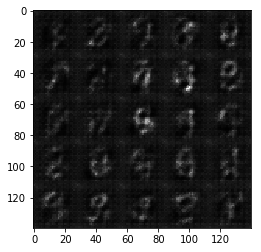

Epoch 1/2... Discriminator Loss: 0.6443... Generator Loss: 1.6477
Epoch 1/2... Discriminator Loss: 0.8938... Generator Loss: 0.9530
Epoch 1/2... Discriminator Loss: 0.7136... Generator Loss: 1.3277
Epoch 1/2... Discriminator Loss: 0.7584... Generator Loss: 3.1500
Epoch 1/2... Discriminator Loss: 0.5309... Generator Loss: 2.1315
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.9652
Epoch 1/2... Discriminator Loss: 0.5566... Generator Loss: 1.8061
Epoch 1/2... Discriminator Loss: 0.9184... Generator Loss: 3.3155
Epoch 1/2... Discriminator Loss: 0.5370... Generator Loss: 2.0965
Epoch 1/2... Discriminator Loss: 0.6251... Generator Loss: 2.8749


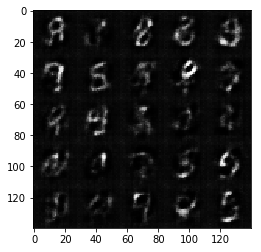

Epoch 1/2... Discriminator Loss: 0.7021... Generator Loss: 1.3052
Epoch 1/2... Discriminator Loss: 0.6417... Generator Loss: 2.4599
Epoch 1/2... Discriminator Loss: 0.5586... Generator Loss: 2.5480
Epoch 1/2... Discriminator Loss: 0.5408... Generator Loss: 2.5837
Epoch 1/2... Discriminator Loss: 0.6290... Generator Loss: 1.6621
Epoch 1/2... Discriminator Loss: 0.8086... Generator Loss: 1.0968
Epoch 1/2... Discriminator Loss: 0.5989... Generator Loss: 2.9267
Epoch 1/2... Discriminator Loss: 1.0763... Generator Loss: 0.7558
Epoch 1/2... Discriminator Loss: 0.5523... Generator Loss: 2.1363
Epoch 1/2... Discriminator Loss: 0.5995... Generator Loss: 1.8024


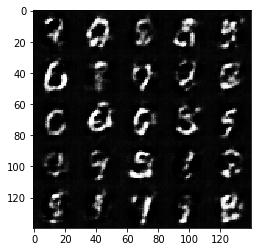

Epoch 1/2... Discriminator Loss: 0.5443... Generator Loss: 2.3771
Epoch 1/2... Discriminator Loss: 0.7585... Generator Loss: 1.2008
Epoch 1/2... Discriminator Loss: 0.5784... Generator Loss: 2.0463
Epoch 1/2... Discriminator Loss: 0.7045... Generator Loss: 3.3455
Epoch 1/2... Discriminator Loss: 0.5636... Generator Loss: 2.4444
Epoch 1/2... Discriminator Loss: 0.6037... Generator Loss: 1.7209
Epoch 1/2... Discriminator Loss: 0.6008... Generator Loss: 2.8389
Epoch 1/2... Discriminator Loss: 0.5726... Generator Loss: 2.0988
Epoch 1/2... Discriminator Loss: 0.5146... Generator Loss: 2.3521
Epoch 1/2... Discriminator Loss: 0.5595... Generator Loss: 2.1594


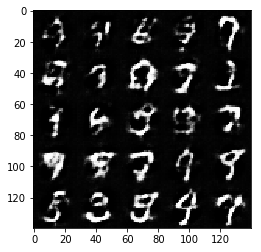

Epoch 1/2... Discriminator Loss: 0.6481... Generator Loss: 1.4958
Epoch 1/2... Discriminator Loss: 0.6200... Generator Loss: 3.0950
Epoch 1/2... Discriminator Loss: 0.5492... Generator Loss: 2.1770
Epoch 1/2... Discriminator Loss: 0.6097... Generator Loss: 2.4580
Epoch 1/2... Discriminator Loss: 0.6389... Generator Loss: 1.6961
Epoch 1/2... Discriminator Loss: 0.9848... Generator Loss: 0.8847
Epoch 1/2... Discriminator Loss: 0.5362... Generator Loss: 2.0100
Epoch 1/2... Discriminator Loss: 0.5547... Generator Loss: 2.6309
Epoch 1/2... Discriminator Loss: 0.7563... Generator Loss: 1.2830
Epoch 1/2... Discriminator Loss: 0.5952... Generator Loss: 2.1405


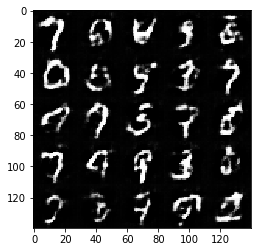

Epoch 1/2... Discriminator Loss: 0.5545... Generator Loss: 2.4213
Epoch 1/2... Discriminator Loss: 0.5276... Generator Loss: 2.6361
Epoch 1/2... Discriminator Loss: 0.5959... Generator Loss: 1.8344
Epoch 1/2... Discriminator Loss: 0.5613... Generator Loss: 2.8545
Epoch 1/2... Discriminator Loss: 0.5681... Generator Loss: 2.0980
Epoch 1/2... Discriminator Loss: 0.5604... Generator Loss: 2.1318
Epoch 1/2... Discriminator Loss: 0.6297... Generator Loss: 2.1220
Epoch 1/2... Discriminator Loss: 0.9069... Generator Loss: 3.1224
Epoch 1/2... Discriminator Loss: 0.7690... Generator Loss: 2.7266
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.8369


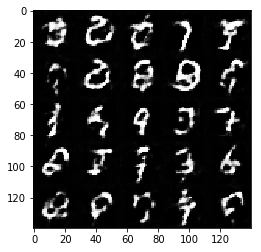

Epoch 1/2... Discriminator Loss: 0.6115... Generator Loss: 1.7047
Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 2.1548
Epoch 1/2... Discriminator Loss: 0.6954... Generator Loss: 1.4650
Epoch 1/2... Discriminator Loss: 0.6406... Generator Loss: 1.9993
Epoch 1/2... Discriminator Loss: 0.6733... Generator Loss: 1.6643
Epoch 1/2... Discriminator Loss: 0.8738... Generator Loss: 1.0341
Epoch 1/2... Discriminator Loss: 0.5936... Generator Loss: 1.6979
Epoch 1/2... Discriminator Loss: 0.6934... Generator Loss: 1.5854
Epoch 1/2... Discriminator Loss: 0.7586... Generator Loss: 1.2226
Epoch 1/2... Discriminator Loss: 0.6371... Generator Loss: 1.6272


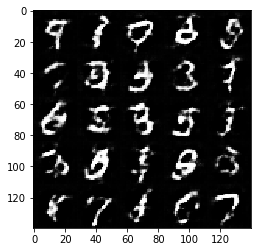

Epoch 1/2... Discriminator Loss: 0.5810... Generator Loss: 2.2044
Epoch 1/2... Discriminator Loss: 0.7493... Generator Loss: 1.2514
Epoch 1/2... Discriminator Loss: 0.7683... Generator Loss: 1.2312
Epoch 2/2... Discriminator Loss: 0.8487... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 1.4101... Generator Loss: 3.6980
Epoch 2/2... Discriminator Loss: 0.5803... Generator Loss: 2.0675
Epoch 2/2... Discriminator Loss: 0.5627... Generator Loss: 2.2054
Epoch 2/2... Discriminator Loss: 0.6650... Generator Loss: 1.7150
Epoch 2/2... Discriminator Loss: 0.8265... Generator Loss: 1.0943
Epoch 2/2... Discriminator Loss: 0.8805... Generator Loss: 1.0058


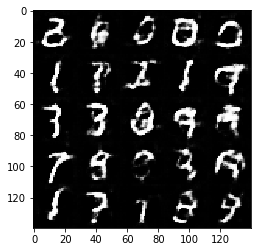

Epoch 2/2... Discriminator Loss: 0.7347... Generator Loss: 2.8097
Epoch 2/2... Discriminator Loss: 0.5980... Generator Loss: 2.0236
Epoch 2/2... Discriminator Loss: 0.5955... Generator Loss: 1.7950
Epoch 2/2... Discriminator Loss: 0.6776... Generator Loss: 1.4282
Epoch 2/2... Discriminator Loss: 0.6829... Generator Loss: 1.4442
Epoch 2/2... Discriminator Loss: 0.6008... Generator Loss: 1.8117
Epoch 2/2... Discriminator Loss: 1.0709... Generator Loss: 0.7996
Epoch 2/2... Discriminator Loss: 0.7766... Generator Loss: 1.2217
Epoch 2/2... Discriminator Loss: 1.5074... Generator Loss: 0.5583
Epoch 2/2... Discriminator Loss: 0.6252... Generator Loss: 1.8715


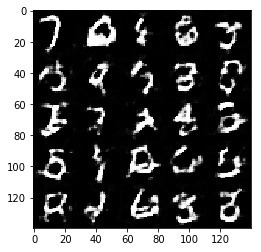

Epoch 2/2... Discriminator Loss: 0.7267... Generator Loss: 1.3652
Epoch 2/2... Discriminator Loss: 0.6203... Generator Loss: 2.1107
Epoch 2/2... Discriminator Loss: 0.8352... Generator Loss: 1.0466
Epoch 2/2... Discriminator Loss: 0.6054... Generator Loss: 1.7589
Epoch 2/2... Discriminator Loss: 0.6936... Generator Loss: 1.4045
Epoch 2/2... Discriminator Loss: 0.6359... Generator Loss: 1.8062
Epoch 2/2... Discriminator Loss: 0.6529... Generator Loss: 1.7176
Epoch 2/2... Discriminator Loss: 0.6627... Generator Loss: 1.7437
Epoch 2/2... Discriminator Loss: 0.6760... Generator Loss: 1.6588
Epoch 2/2... Discriminator Loss: 1.0713... Generator Loss: 0.7650


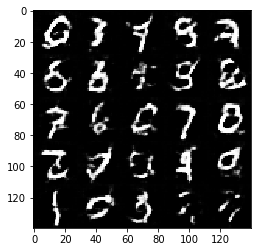

Epoch 2/2... Discriminator Loss: 0.7242... Generator Loss: 1.3197
Epoch 2/2... Discriminator Loss: 0.6109... Generator Loss: 1.7319
Epoch 2/2... Discriminator Loss: 0.7497... Generator Loss: 2.6969
Epoch 2/2... Discriminator Loss: 0.6796... Generator Loss: 1.9212
Epoch 2/2... Discriminator Loss: 0.5853... Generator Loss: 1.7691
Epoch 2/2... Discriminator Loss: 8.6931... Generator Loss: 10.6178
Epoch 2/2... Discriminator Loss: 0.8810... Generator Loss: 1.3203
Epoch 2/2... Discriminator Loss: 0.8967... Generator Loss: 1.0123
Epoch 2/2... Discriminator Loss: 0.5918... Generator Loss: 2.0526
Epoch 2/2... Discriminator Loss: 0.6121... Generator Loss: 1.8061


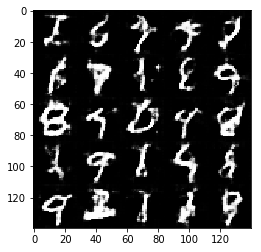

Epoch 2/2... Discriminator Loss: 0.6839... Generator Loss: 1.4592
Epoch 2/2... Discriminator Loss: 0.5929... Generator Loss: 1.8431
Epoch 2/2... Discriminator Loss: 0.5966... Generator Loss: 1.8478
Epoch 2/2... Discriminator Loss: 0.6454... Generator Loss: 1.6158
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 1.5078
Epoch 2/2... Discriminator Loss: 0.6394... Generator Loss: 1.5627
Epoch 2/2... Discriminator Loss: 0.7189... Generator Loss: 1.3126
Epoch 2/2... Discriminator Loss: 0.6521... Generator Loss: 1.4757
Epoch 2/2... Discriminator Loss: 0.8261... Generator Loss: 1.0859
Epoch 2/2... Discriminator Loss: 0.6829... Generator Loss: 1.6239


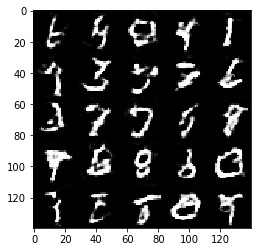

Epoch 2/2... Discriminator Loss: 1.0698... Generator Loss: 1.3511
Epoch 2/2... Discriminator Loss: 0.7818... Generator Loss: 1.4846
Epoch 2/2... Discriminator Loss: 0.7420... Generator Loss: 2.2569
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 0.9248
Epoch 2/2... Discriminator Loss: 0.7097... Generator Loss: 1.5004
Epoch 2/2... Discriminator Loss: 0.6484... Generator Loss: 1.5421
Epoch 2/2... Discriminator Loss: 0.7895... Generator Loss: 1.1960
Epoch 2/2... Discriminator Loss: 1.8441... Generator Loss: 3.2125
Epoch 2/2... Discriminator Loss: 0.8584... Generator Loss: 1.4593
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 1.2279


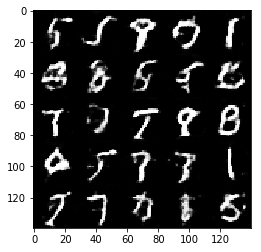

Epoch 2/2... Discriminator Loss: 0.8033... Generator Loss: 1.2426
Epoch 2/2... Discriminator Loss: 1.1412... Generator Loss: 2.8650
Epoch 2/2... Discriminator Loss: 0.6209... Generator Loss: 1.5992
Epoch 2/2... Discriminator Loss: 0.6863... Generator Loss: 1.4737
Epoch 2/2... Discriminator Loss: 0.7888... Generator Loss: 1.1774
Epoch 2/2... Discriminator Loss: 0.5938... Generator Loss: 1.8271
Epoch 2/2... Discriminator Loss: 0.6413... Generator Loss: 1.5776
Epoch 2/2... Discriminator Loss: 2.5091... Generator Loss: 0.1721
Epoch 2/2... Discriminator Loss: 0.6770... Generator Loss: 1.8315
Epoch 2/2... Discriminator Loss: 0.5554... Generator Loss: 2.1373


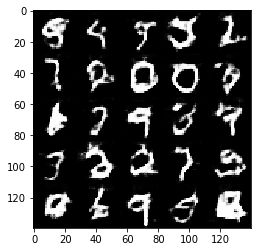

Epoch 2/2... Discriminator Loss: 0.6464... Generator Loss: 1.5512
Epoch 2/2... Discriminator Loss: 0.7155... Generator Loss: 1.3143
Epoch 2/2... Discriminator Loss: 0.6309... Generator Loss: 1.6273
Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.0070
Epoch 2/2... Discriminator Loss: 0.6337... Generator Loss: 1.6488
Epoch 2/2... Discriminator Loss: 1.0578... Generator Loss: 0.8186
Epoch 2/2... Discriminator Loss: 1.0148... Generator Loss: 0.8062
Epoch 2/2... Discriminator Loss: 0.7693... Generator Loss: 1.2167
Epoch 2/2... Discriminator Loss: 0.6186... Generator Loss: 1.7009
Epoch 2/2... Discriminator Loss: 0.8044... Generator Loss: 1.1399


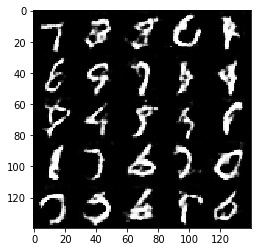

Epoch 2/2... Discriminator Loss: 0.6529... Generator Loss: 1.4881
Epoch 2/2... Discriminator Loss: 1.0183... Generator Loss: 0.8582
Epoch 2/2... Discriminator Loss: 0.7376... Generator Loss: 1.6938
Epoch 2/2... Discriminator Loss: 0.7404... Generator Loss: 1.2944
Epoch 2/2... Discriminator Loss: 0.6295... Generator Loss: 1.8683
Epoch 2/2... Discriminator Loss: 0.6677... Generator Loss: 1.3889
Epoch 2/2... Discriminator Loss: 0.6105... Generator Loss: 1.7500
Epoch 2/2... Discriminator Loss: 0.5540... Generator Loss: 2.1348
Epoch 2/2... Discriminator Loss: 0.7260... Generator Loss: 1.3783
Epoch 2/2... Discriminator Loss: 0.6873... Generator Loss: 1.6257


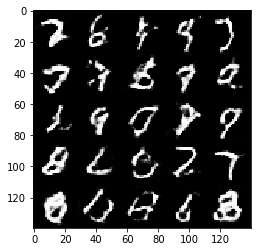

Epoch 2/2... Discriminator Loss: 1.1310... Generator Loss: 0.8169
Epoch 2/2... Discriminator Loss: 0.7104... Generator Loss: 1.5661
Epoch 2/2... Discriminator Loss: 0.7897... Generator Loss: 1.6360
Epoch 2/2... Discriminator Loss: 1.2657... Generator Loss: 0.5659
Epoch 2/2... Discriminator Loss: 0.6593... Generator Loss: 1.8045
Epoch 2/2... Discriminator Loss: 0.8204... Generator Loss: 1.0909
Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 1.7898


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7698... Generator Loss: 1.3335
Epoch 1/1... Discriminator Loss: 0.6249... Generator Loss: 1.6999
Epoch 1/1... Discriminator Loss: 0.6177... Generator Loss: 1.8304
Epoch 1/1... Discriminator Loss: 0.4932... Generator Loss: 2.4520
Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 3.2705
Epoch 1/1... Discriminator Loss: 0.4226... Generator Loss: 3.0672
Epoch 1/1... Discriminator Loss: 0.3998... Generator Loss: 3.9163
Epoch 1/1... Discriminator Loss: 0.4646... Generator Loss: 2.5204
Epoch 1/1... Discriminator Loss: 0.4177... Generator Loss: 4.1900
Epoch 1/1... Discriminator Loss: 0.4726... Generator Loss: 2.8850


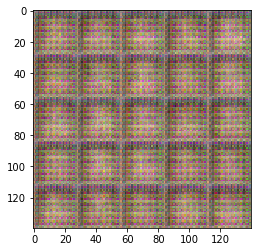

Epoch 1/1... Discriminator Loss: 0.6130... Generator Loss: 2.2003
Epoch 1/1... Discriminator Loss: 0.5077... Generator Loss: 2.3739
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 0.6771... Generator Loss: 1.9446
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 2.7616
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 1.7069
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 2.2264
Epoch 1/1... Discriminator Loss: 0.6387... Generator Loss: 1.5632
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 1.2966
Epoch 1/1... Discriminator Loss: 0.5386... Generator Loss: 3.7270


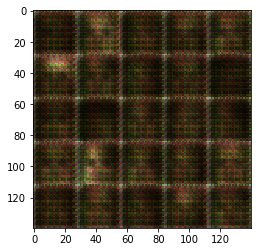

Epoch 1/1... Discriminator Loss: 0.5358... Generator Loss: 4.0207
Epoch 1/1... Discriminator Loss: 0.7696... Generator Loss: 1.2537
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 1.1053
Epoch 1/1... Discriminator Loss: 0.5548... Generator Loss: 2.8393
Epoch 1/1... Discriminator Loss: 0.6575... Generator Loss: 1.6055
Epoch 1/1... Discriminator Loss: 0.4782... Generator Loss: 2.7418
Epoch 1/1... Discriminator Loss: 0.5750... Generator Loss: 3.1575
Epoch 1/1... Discriminator Loss: 0.5690... Generator Loss: 2.0862
Epoch 1/1... Discriminator Loss: 0.5956... Generator Loss: 1.8720
Epoch 1/1... Discriminator Loss: 0.5693... Generator Loss: 2.5600


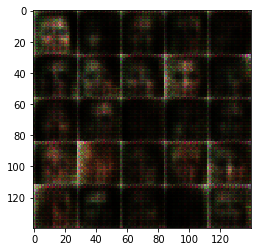

Epoch 1/1... Discriminator Loss: 0.5637... Generator Loss: 2.4322
Epoch 1/1... Discriminator Loss: 0.6296... Generator Loss: 1.7667
Epoch 1/1... Discriminator Loss: 0.6822... Generator Loss: 1.9780
Epoch 1/1... Discriminator Loss: 0.7024... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 2.0422
Epoch 1/1... Discriminator Loss: 0.6822... Generator Loss: 2.7154
Epoch 1/1... Discriminator Loss: 0.5748... Generator Loss: 2.1155
Epoch 1/1... Discriminator Loss: 0.8802... Generator Loss: 1.1258
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 2.7672
Epoch 1/1... Discriminator Loss: 0.6272... Generator Loss: 1.9146


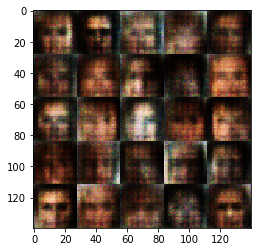

Epoch 1/1... Discriminator Loss: 0.6930... Generator Loss: 1.6512
Epoch 1/1... Discriminator Loss: 0.7386... Generator Loss: 3.0680
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.5314
Epoch 1/1... Discriminator Loss: 0.7604... Generator Loss: 2.6881
Epoch 1/1... Discriminator Loss: 0.8040... Generator Loss: 1.2621
Epoch 1/1... Discriminator Loss: 1.1772... Generator Loss: 2.6444
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 1.7094
Epoch 1/1... Discriminator Loss: 0.8798... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 2.5024
Epoch 1/1... Discriminator Loss: 0.9649... Generator Loss: 1.1221


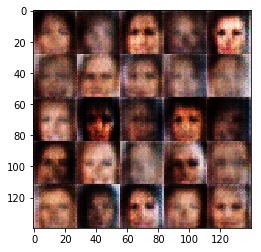

Epoch 1/1... Discriminator Loss: 0.7325... Generator Loss: 1.6606
Epoch 1/1... Discriminator Loss: 1.5129... Generator Loss: 0.4787
Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 0.7691
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 2.9329
Epoch 1/1... Discriminator Loss: 0.7528... Generator Loss: 1.7031
Epoch 1/1... Discriminator Loss: 0.7653... Generator Loss: 1.4192
Epoch 1/1... Discriminator Loss: 0.7601... Generator Loss: 2.0448
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 0.7513... Generator Loss: 1.7960


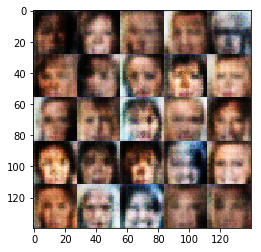

Epoch 1/1... Discriminator Loss: 0.7566... Generator Loss: 1.4294
Epoch 1/1... Discriminator Loss: 0.8040... Generator Loss: 1.2637
Epoch 1/1... Discriminator Loss: 0.8028... Generator Loss: 1.4351
Epoch 1/1... Discriminator Loss: 0.7384... Generator Loss: 1.4140
Epoch 1/1... Discriminator Loss: 0.8689... Generator Loss: 2.1806
Epoch 1/1... Discriminator Loss: 1.0653... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 0.8667... Generator Loss: 1.9551
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.3445
Epoch 1/1... Discriminator Loss: 0.8818... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 0.7998... Generator Loss: 1.9788


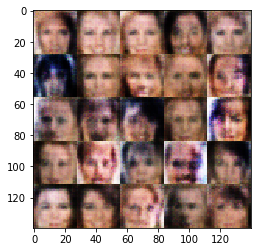

Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 0.8790
Epoch 1/1... Discriminator Loss: 0.6590... Generator Loss: 1.5530
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 0.8009... Generator Loss: 1.3293
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 2.5719
Epoch 1/1... Discriminator Loss: 0.9927... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 0.8180... Generator Loss: 1.8052
Epoch 1/1... Discriminator Loss: 0.7233... Generator Loss: 1.7703
Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 3.9439
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.3889


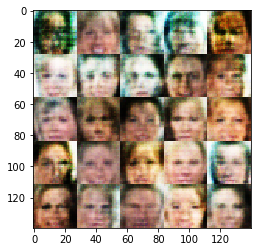

Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 2.2133
Epoch 1/1... Discriminator Loss: 0.8052... Generator Loss: 1.4412
Epoch 1/1... Discriminator Loss: 0.7416... Generator Loss: 1.6215
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 0.8896... Generator Loss: 1.2729
Epoch 1/1... Discriminator Loss: 0.8341... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 0.8736... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 0.9208
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 1.9787


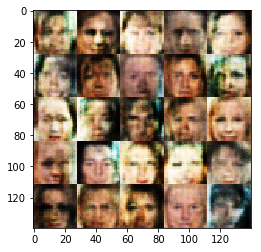

Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.0046
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 2.9743
Epoch 1/1... Discriminator Loss: 0.8329... Generator Loss: 1.9027
Epoch 1/1... Discriminator Loss: 0.7595... Generator Loss: 1.6532
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.2442
Epoch 1/1... Discriminator Loss: 0.8719... Generator Loss: 1.2165
Epoch 1/1... Discriminator Loss: 0.8703... Generator Loss: 1.9007
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 0.8149... Generator Loss: 1.8955
Epoch 1/1... Discriminator Loss: 0.9709... Generator Loss: 1.0410


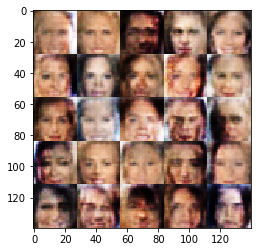

Epoch 1/1... Discriminator Loss: 0.7909... Generator Loss: 1.6802
Epoch 1/1... Discriminator Loss: 0.8908... Generator Loss: 1.1605
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 1.0300
Epoch 1/1... Discriminator Loss: 0.8102... Generator Loss: 1.8810
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 3.0026
Epoch 1/1... Discriminator Loss: 0.9181... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.8004... Generator Loss: 1.3852
Epoch 1/1... Discriminator Loss: 0.8006... Generator Loss: 1.7925
Epoch 1/1... Discriminator Loss: 0.9245... Generator Loss: 1.8494
Epoch 1/1... Discriminator Loss: 0.7866... Generator Loss: 1.4428


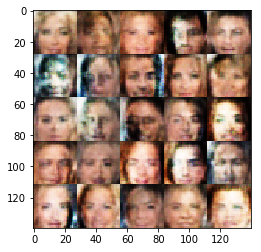

Epoch 1/1... Discriminator Loss: 0.8184... Generator Loss: 1.7465
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 0.8283... Generator Loss: 1.4618
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 1.0569
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 2.2084
Epoch 1/1... Discriminator Loss: 1.2121... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 0.9498... Generator Loss: 1.6147
Epoch 1/1... Discriminator Loss: 0.9319... Generator Loss: 1.6645
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.0717
Epoch 1/1... Discriminator Loss: 0.8660... Generator Loss: 1.2202


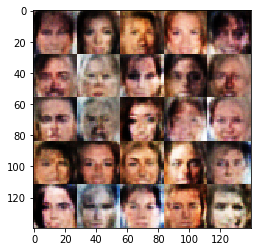

Epoch 1/1... Discriminator Loss: 0.8257... Generator Loss: 1.6892
Epoch 1/1... Discriminator Loss: 0.8829... Generator Loss: 1.0963
Epoch 1/1... Discriminator Loss: 0.8119... Generator Loss: 1.7341
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 0.9143
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 1.4171
Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 1.4744
Epoch 1/1... Discriminator Loss: 0.9582... Generator Loss: 0.9433
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.3124
Epoch 1/1... Discriminator Loss: 0.8849... Generator Loss: 1.2844


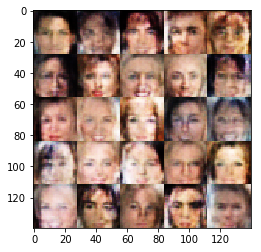

Epoch 1/1... Discriminator Loss: 0.9716... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 0.8932... Generator Loss: 1.2674
Epoch 1/1... Discriminator Loss: 0.9527... Generator Loss: 0.9557
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 1.6046
Epoch 1/1... Discriminator Loss: 0.9360... Generator Loss: 1.3186
Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 1.6202
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 2.3377
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.7485
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 0.8417


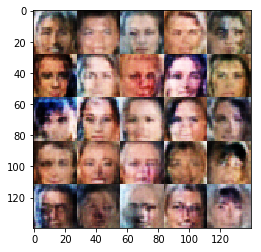

Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 1.9126
Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 0.7837... Generator Loss: 1.6647
Epoch 1/1... Discriminator Loss: 0.8555... Generator Loss: 1.3940
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 1.0951
Epoch 1/1... Discriminator Loss: 0.8864... Generator Loss: 1.3055
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 2.1827


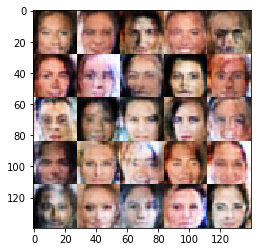

Epoch 1/1... Discriminator Loss: 1.0225... Generator Loss: 0.8366
Epoch 1/1... Discriminator Loss: 0.9136... Generator Loss: 1.5130
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.8344
Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 1.4255
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.7062
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.0169
Epoch 1/1... Discriminator Loss: 1.0480... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 0.9102... Generator Loss: 1.1156
Epoch 1/1... Discriminator Loss: 0.9607... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 0.8800... Generator Loss: 1.0533


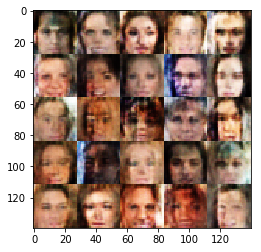

Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 0.9721... Generator Loss: 1.0773
Epoch 1/1... Discriminator Loss: 0.8859... Generator Loss: 1.5065
Epoch 1/1... Discriminator Loss: 0.8603... Generator Loss: 1.1749
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 1.0626
Epoch 1/1... Discriminator Loss: 0.7237... Generator Loss: 1.5606
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 1.2122
Epoch 1/1... Discriminator Loss: 1.0470... Generator Loss: 2.0572
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 0.8125


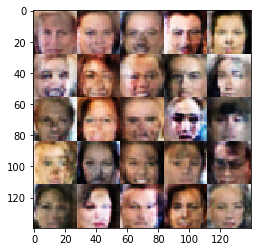

Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 0.7707... Generator Loss: 1.3539
Epoch 1/1... Discriminator Loss: 0.7825... Generator Loss: 1.5687
Epoch 1/1... Discriminator Loss: 1.2892... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 0.8395... Generator Loss: 1.8202
Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 1.0607
Epoch 1/1... Discriminator Loss: 0.8222... Generator Loss: 1.2898
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 0.7150... Generator Loss: 1.8427
Epoch 1/1... Discriminator Loss: 0.8517... Generator Loss: 1.3020


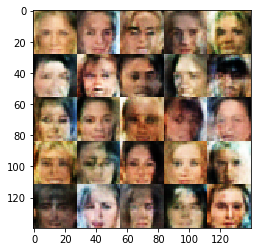

Epoch 1/1... Discriminator Loss: 0.8048... Generator Loss: 1.7992
Epoch 1/1... Discriminator Loss: 0.8387... Generator Loss: 1.2058
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 0.5954... Generator Loss: 2.1097
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 1.7240
Epoch 1/1... Discriminator Loss: 0.8342... Generator Loss: 1.2170
Epoch 1/1... Discriminator Loss: 0.8871... Generator Loss: 1.3164
Epoch 1/1... Discriminator Loss: 0.8612... Generator Loss: 1.0518
Epoch 1/1... Discriminator Loss: 0.8071... Generator Loss: 1.1364
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 2.0824


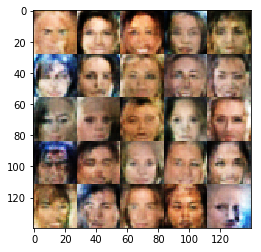

Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 1.6072
Epoch 1/1... Discriminator Loss: 2.1337... Generator Loss: 0.2204
Epoch 1/1... Discriminator Loss: 0.9224... Generator Loss: 1.8860
Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 0.7298
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 1.1802
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.6055
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 1.4926
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.1922
Epoch 1/1... Discriminator Loss: 0.8960... Generator Loss: 1.9122
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 1.9939


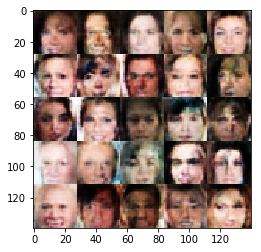

Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 0.9403
Epoch 1/1... Discriminator Loss: 0.9493... Generator Loss: 1.0783
Epoch 1/1... Discriminator Loss: 0.8773... Generator Loss: 1.2419
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 1.8075
Epoch 1/1... Discriminator Loss: 1.0426... Generator Loss: 2.3324
Epoch 1/1... Discriminator Loss: 0.7019... Generator Loss: 1.7742


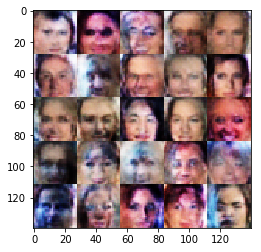

Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.2213
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 1.4536
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 1.5103
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 2.8417
Epoch 1/1... Discriminator Loss: 1.0828... Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 0.8545... Generator Loss: 1.4215
Epoch 1/1... Discriminator Loss: 0.7180... Generator Loss: 1.5645
Epoch 1/1... Discriminator Loss: 0.6737... Generator Loss: 2.2666
Epoch 1/1... Discriminator Loss: 0.8664... Generator Loss: 1.6607
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.7289


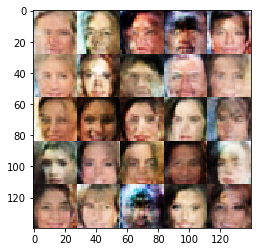

Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 1.5610
Epoch 1/1... Discriminator Loss: 0.8256... Generator Loss: 1.3241
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 1.1770
Epoch 1/1... Discriminator Loss: 0.6421... Generator Loss: 2.3485
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 2.0918
Epoch 1/1... Discriminator Loss: 1.2116... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 0.8890... Generator Loss: 1.1394
Epoch 1/1... Discriminator Loss: 0.8630... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 0.8304
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 0.7074


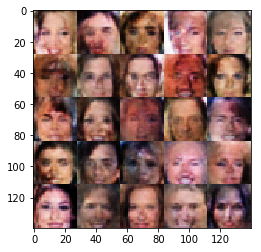

Epoch 1/1... Discriminator Loss: 0.8438... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 0.7011... Generator Loss: 1.8947
Epoch 1/1... Discriminator Loss: 0.8298... Generator Loss: 1.4452
Epoch 1/1... Discriminator Loss: 1.1304... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 0.6541... Generator Loss: 1.8083
Epoch 1/1... Discriminator Loss: 0.7497... Generator Loss: 1.3841
Epoch 1/1... Discriminator Loss: 0.7962... Generator Loss: 1.2751
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 0.7768... Generator Loss: 1.7794


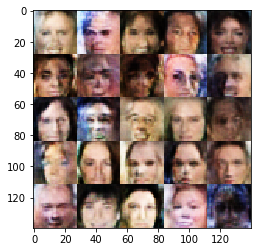

Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 0.9167
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.0399
Epoch 1/1... Discriminator Loss: 1.1952... Generator Loss: 0.6706
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 0.7050... Generator Loss: 1.5216
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 0.8951
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 3.1574
Epoch 1/1... Discriminator Loss: 0.8721... Generator Loss: 1.5372
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 0.8919


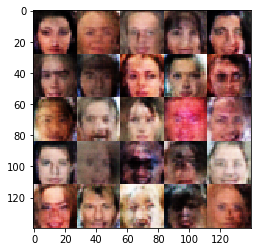

Epoch 1/1... Discriminator Loss: 0.8107... Generator Loss: 1.3339
Epoch 1/1... Discriminator Loss: 0.9366... Generator Loss: 1.0155
Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 1.2796
Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 1.1178
Epoch 1/1... Discriminator Loss: 0.8387... Generator Loss: 1.6362
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.1334
Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 0.8874... Generator Loss: 1.2576
Epoch 1/1... Discriminator Loss: 0.8373... Generator Loss: 1.5905


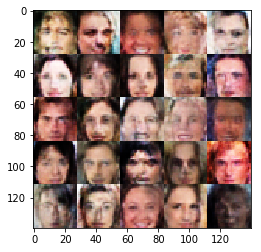

Epoch 1/1... Discriminator Loss: 0.7654... Generator Loss: 1.4727
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 1.4915
Epoch 1/1... Discriminator Loss: 0.9084... Generator Loss: 1.3049
Epoch 1/1... Discriminator Loss: 1.0350... Generator Loss: 1.0441
Epoch 1/1... Discriminator Loss: 0.6333... Generator Loss: 1.8485
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 1.4473
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 1.5701
Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 0.9736... Generator Loss: 1.3581


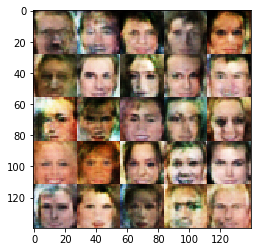

Epoch 1/1... Discriminator Loss: 0.7991... Generator Loss: 1.4286
Epoch 1/1... Discriminator Loss: 0.6671... Generator Loss: 1.9613
Epoch 1/1... Discriminator Loss: 0.6993... Generator Loss: 1.7323
Epoch 1/1... Discriminator Loss: 0.6635... Generator Loss: 1.9998
Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 1.9043
Epoch 1/1... Discriminator Loss: 0.7031... Generator Loss: 1.7207
Epoch 1/1... Discriminator Loss: 0.9978... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 0.7251... Generator Loss: 1.6248
Epoch 1/1... Discriminator Loss: 0.7960... Generator Loss: 1.1714
Epoch 1/1... Discriminator Loss: 0.9920... Generator Loss: 1.7644


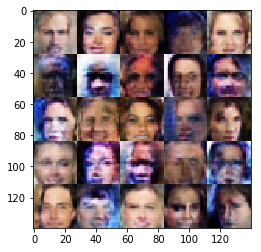

Epoch 1/1... Discriminator Loss: 0.7258... Generator Loss: 2.1227
Epoch 1/1... Discriminator Loss: 0.9767... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 1.4617
Epoch 1/1... Discriminator Loss: 0.8047... Generator Loss: 1.5965
Epoch 1/1... Discriminator Loss: 0.7210... Generator Loss: 1.8035
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 2.0198
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 0.7954... Generator Loss: 1.4280
Epoch 1/1... Discriminator Loss: 0.7715... Generator Loss: 1.4625


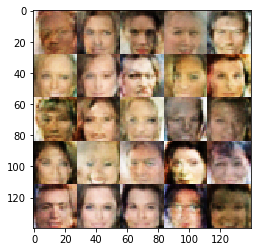

Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.5060
Epoch 1/1... Discriminator Loss: 1.0942... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 0.7248... Generator Loss: 1.6880
Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 1.9025
Epoch 1/1... Discriminator Loss: 0.7971... Generator Loss: 1.3613
Epoch 1/1... Discriminator Loss: 0.7194... Generator Loss: 1.6185
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 1.4329
Epoch 1/1... Discriminator Loss: 0.8047... Generator Loss: 1.2877
Epoch 1/1... Discriminator Loss: 0.6912... Generator Loss: 1.6732
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 1.0063


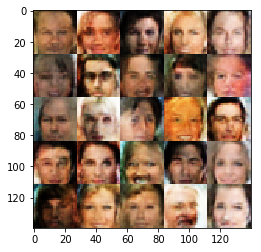

Epoch 1/1... Discriminator Loss: 0.9464... Generator Loss: 0.8843
Epoch 1/1... Discriminator Loss: 0.6224... Generator Loss: 2.7008
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.1802
Epoch 1/1... Discriminator Loss: 0.8405... Generator Loss: 1.2305
Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 1.1015
Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 0.9480
Epoch 1/1... Discriminator Loss: 0.8458... Generator Loss: 1.1540
Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 0.9620... Generator Loss: 0.9065


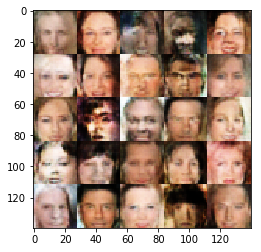

Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 1.1322
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 1.5704
Epoch 1/1... Discriminator Loss: 0.9928... Generator Loss: 1.6826
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 0.7976... Generator Loss: 1.1806
Epoch 1/1... Discriminator Loss: 0.6114... Generator Loss: 2.1759


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.